In [1]:
import scipy.io as sio

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import welch

In [2]:
def calc_psd(tt, xx):
    fs = int(np.ceil(1 / (tt[1] - tt[0])))
    nperseg = fs / 10
    
    return welch(xx, fs=fs, nperseg=nperseg)

def calc_area(ff, psd, lb, ub):
    return np.trapz(psd[lb:ub], ff[lb:ub])

In [17]:
nofeedback_file = r"D:\Experiment\Cooling\230808\2.9e-1mbar_nofeedback.csv"
nofeedback = np.genfromtxt(nofeedback_file, delimiter=',', skip_header=3).T

ff, psd = calc_psd(nofeedback[0], nofeedback[1])

0.0012368725536979833

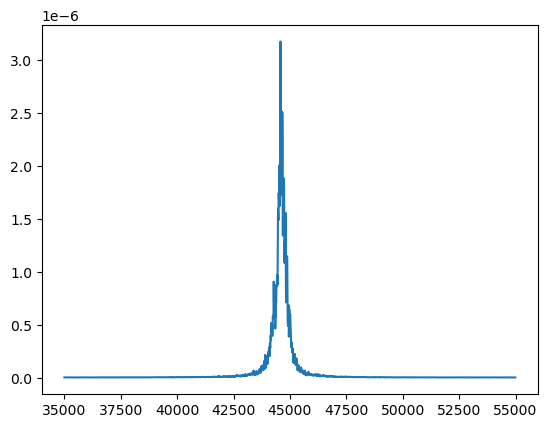

In [18]:
lb, ub = 3500, 5500
plt.plot(ff[lb:ub], psd[lb:ub])

calc_area(ff, psd, lb, ub)

z cooling

In [3]:
phiphi = np.arange(0, 360, 30, dtype=np.float32)
area = np.empty_like(phiphi)

for i, phi in enumerate(phiphi):
    file = fr"D:\Experiment\Cooling\230809\z_10_{int(phi)}.csv"
    dat = np.genfromtxt(file, delimiter=',', skip_header=3).T
    ff, psd = calc_psd(dat[0], dat[1])

    lb, ub = 2800, 4800
    area[i] = calc_area(ff, psd, lb, ub)
#     plt.plot(ff[lb:ub], psd[lb:ub])

Text(0.5, 0, 'PLL phase difference (deg)')

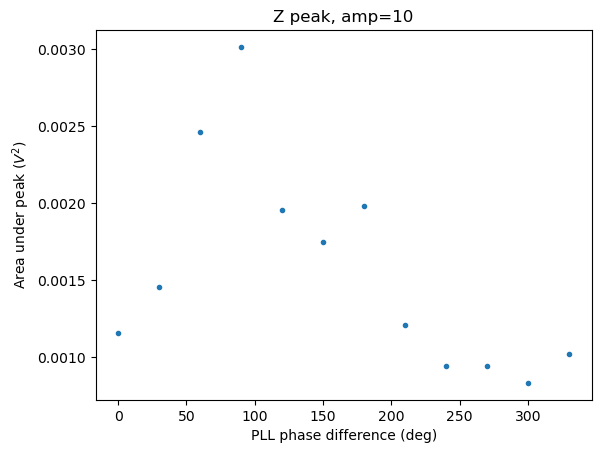

In [4]:
plt.plot(phiphi, area, '.')
plt.title('Z peak, amp=10')
plt.ylabel('Area under peak ($V^2$)')
plt.xlabel('PLL phase difference (deg)')

y cooling

In [7]:
phiphi = np.arange(0, 360, 30, dtype=np.float32)
area = np.empty_like(phiphi)

for i, phi in enumerate(phiphi):
    file = fr"D:\Experiment\Cooling\230809\y_5_{int(phi)}.csv"
    dat = np.genfromtxt(file, delimiter=',', skip_header=3).T
    ff, psd = calc_psd(dat[0], dat[2])

    lb, ub = 13800, 16700
    area[i] = calc_area(ff, psd, lb, ub)
#     plt.plot(ff[lb:ub], psd[lb:ub])

Text(0.5, 0, 'PLL phase difference (deg)')

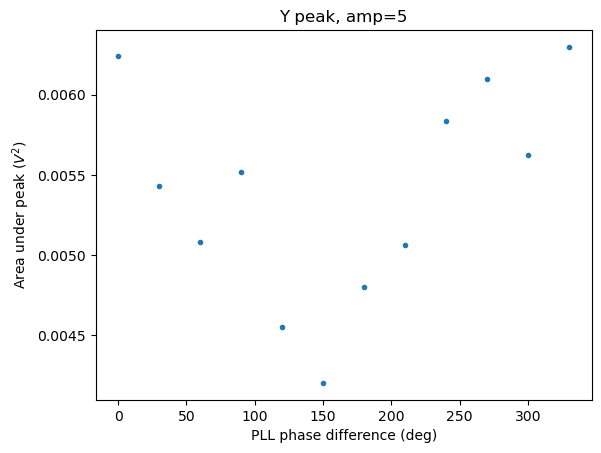

In [8]:
plt.plot(phiphi, area, '.')
plt.title('Y peak, amp=5')
plt.ylabel('Area under peak ($V^2$)')
plt.xlabel('PLL phase difference (deg)')

x cooling

In [13]:
phiphi = np.arange(0, 360, 30, dtype=np.float32)
area = np.empty_like(phiphi)

for i, phi in enumerate(phiphi):
    file = fr"D:\Experiment\Cooling\230809\x_5_{int(phi)}.csv"
    dat = np.genfromtxt(file, delimiter=',', skip_header=3).T
    ff, psd = calc_psd(dat[0], dat[1])

    lb, ub = 15500, 18800
    area[i] = calc_area(ff, psd, lb, ub)
#     plt.plot(ff[lb:ub], psd[lb:ub])

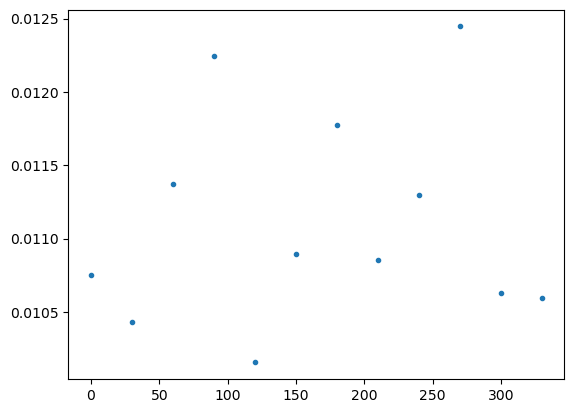

In [14]:
plt.plot(phiphi, area, '.')

Pumping sphere down without feedback

In [33]:
file = r"D:\Experiment\Cooling\230809\1.4e-5\1.4e-5_06.csv"
dat = np.genfromtxt(file, delimiter=',', skip_header=3).T
ff, psd = calc_psd(dat[0], dat[1])
ffy, psdy = calc_psd(dat[0], dat[2])

Text(0, 0.5, '$S_{VV}$ ($V^2$ / Hz)')

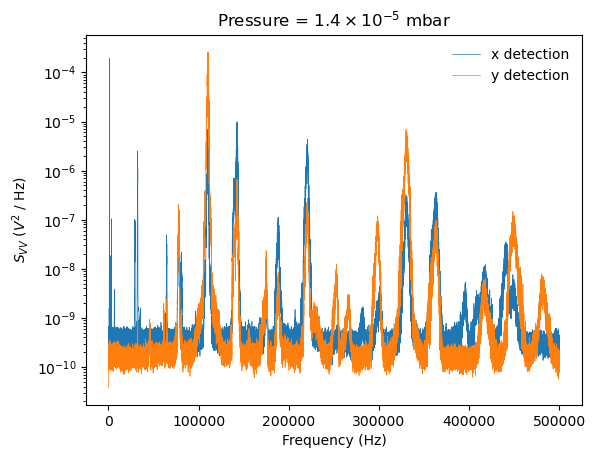

In [34]:
plt.plot(ff, psd, linewidth=0.5, label='x detection')
plt.plot(ffy, psdy, linewidth=0.5, label='y detection')

plt.yscale('log')

plt.title('Pressure = $1.4 \\times 10^{-5}$ mbar')
plt.legend(frameon=False)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$S_{VV}$ ($V^2$ / Hz)')

In [29]:
file = r"D:\Experiment\Cooling\230809\6.5e-6\6.5e-6_05.csv"
dat = np.genfromtxt(file, delimiter=',', skip_header=3).T
ff, psd = calc_psd(dat[0], dat[1])
ffy, psdy = calc_psd(dat[0], dat[2])

Text(0, 0.5, '$S_{VV}$ ($V^2$ / Hz)')

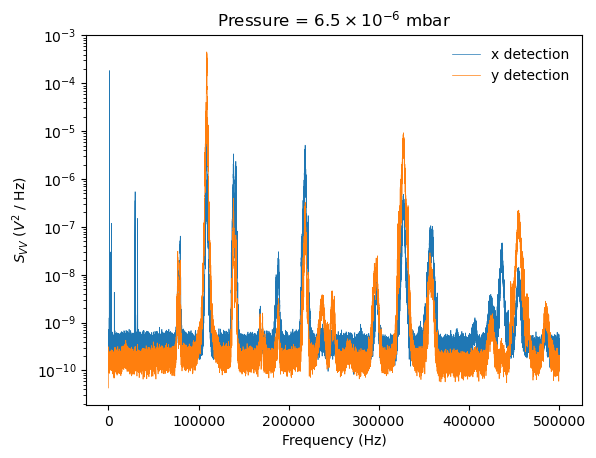

In [32]:
plt.plot(ff, psd, linewidth=0.5, label='x detection')
plt.plot(ffy, psdy, linewidth=0.5, label='y detection')

plt.yscale('log')

plt.title('Pressure = $6.5 \\times 10^{-6}$ mbar')
plt.legend(frameon=False)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$S_{VV}$ ($V^2$ / Hz)')

In [35]:
file = r"D:\Experiment\Cooling\230809\particle2\3.3e-1mbar.csv"
dat = np.genfromtxt(file, delimiter=',', skip_header=3).T
ff, psd = calc_psd(dat[0], dat[1])
ffy, psdy = calc_psd(dat[0], dat[2])

Text(0, 0.5, '$S_{VV}$ ($V^2$ / Hz)')

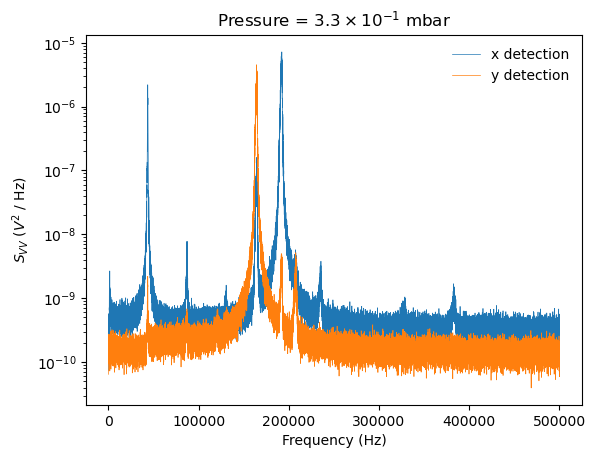

In [36]:
plt.plot(ff, psd, linewidth=0.5, label='x detection')
plt.plot(ffy, psdy, linewidth=0.5, label='y detection')

plt.yscale('log')

plt.title('Pressure = $3.3 \\times 10^{-1}$ mbar')
plt.legend(frameon=False)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$S_{VV}$ ($V^2$ / Hz)')

## Process cooling data on 8/4

In [37]:
file = r"D:\Experiment\Cooling\230804\3e-5mbar\3e-5mbar_04.csv"
dat = np.genfromtxt(file, delimiter=',', skip_header=3).T
ff, psd = calc_psd(dat[0], dat[1])
ffy, psdy = calc_psd(dat[0], dat[2])

Text(0, 0.5, '$S_{VV}$ ($V^2$ / Hz)')

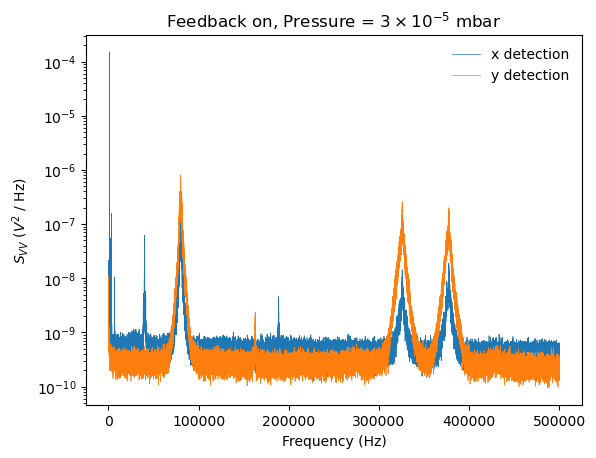

In [38]:
plt.plot(ff, psd, linewidth=0.5, label='x detection')
plt.plot(ffy, psdy, linewidth=0.5, label='y detection')

plt.yscale('log')

plt.title('Feedback on, Pressure = $3 \\times 10^{-5}$ mbar')
plt.legend(frameon=False)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$S_{VV}$ ($V^2$ / Hz)')